In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("parkinsons.data")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [3]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [4]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Correlation Matrix

In [5]:
corr_org = data.corr()

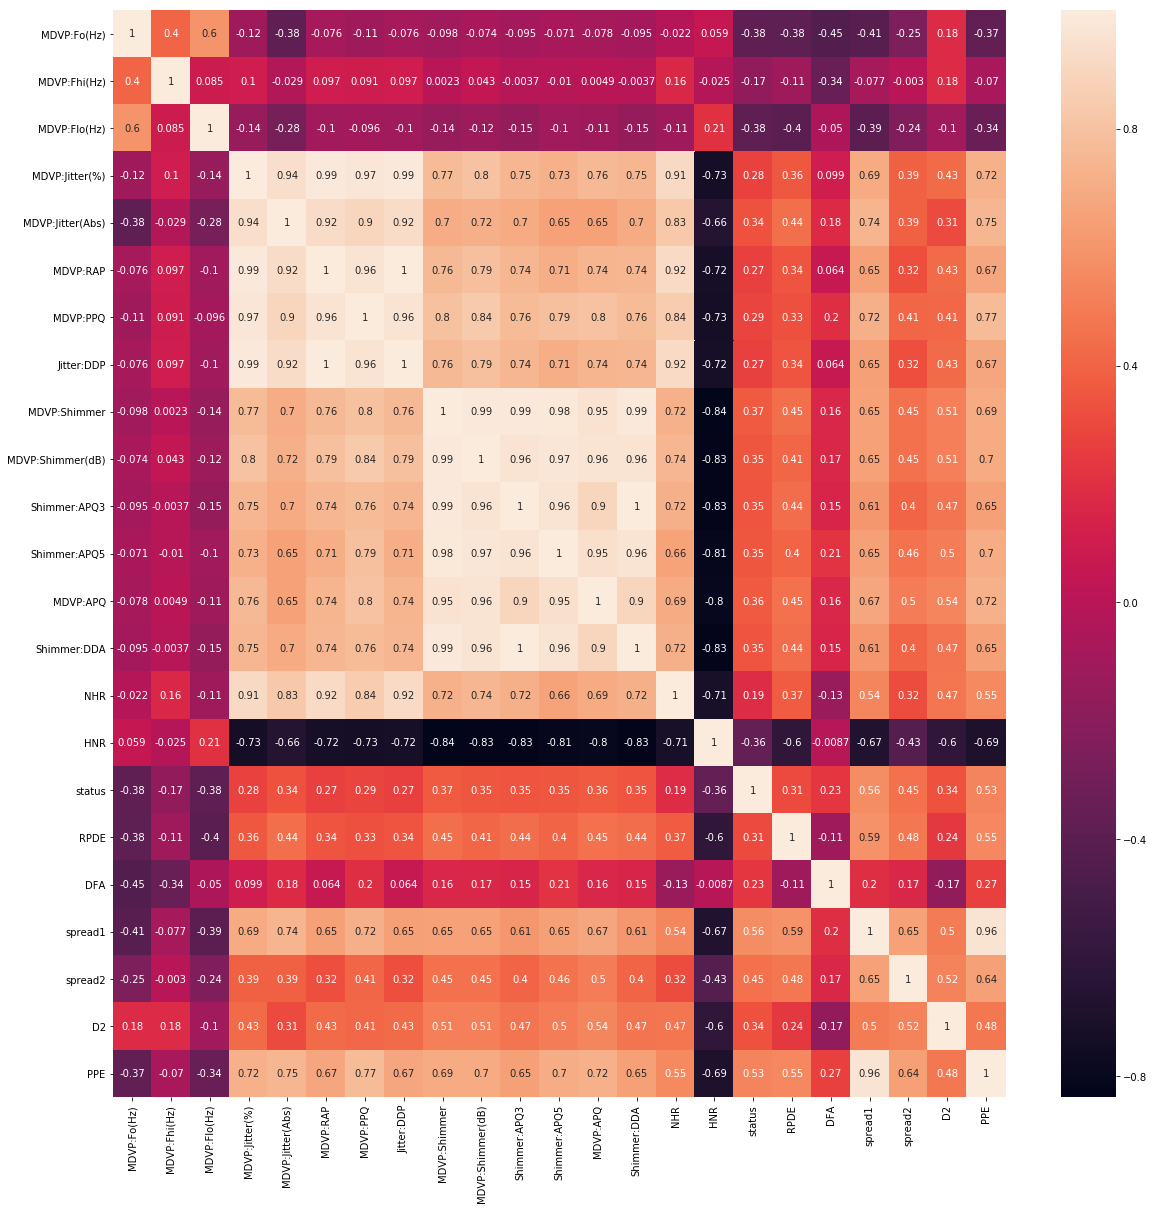

In [6]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_org, annot = True)

Removing the following columns to avoid multicovariance:

1. 'Jitter:DDP',
2. 'MDVP:PPQ',
3. 'MDVP:RAP',
4. 'MDVP:Jitter(Abs)',
5. 'MDVP:Shimmer',
6. 'MDVP:Shimmer(dB)',
7. 'Shimmer:APQ5',
8. 'Shimmer:APQ3',
9. 'spread1'

In [14]:
data_cor = data.drop(columns = {'Jitter:DDP','MDVP:PPQ','MDVP:RAP','MDVP:Jitter(Abs)','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ5','Shimmer:APQ3','spread1'})

In [15]:

corr = data_cor.corr()

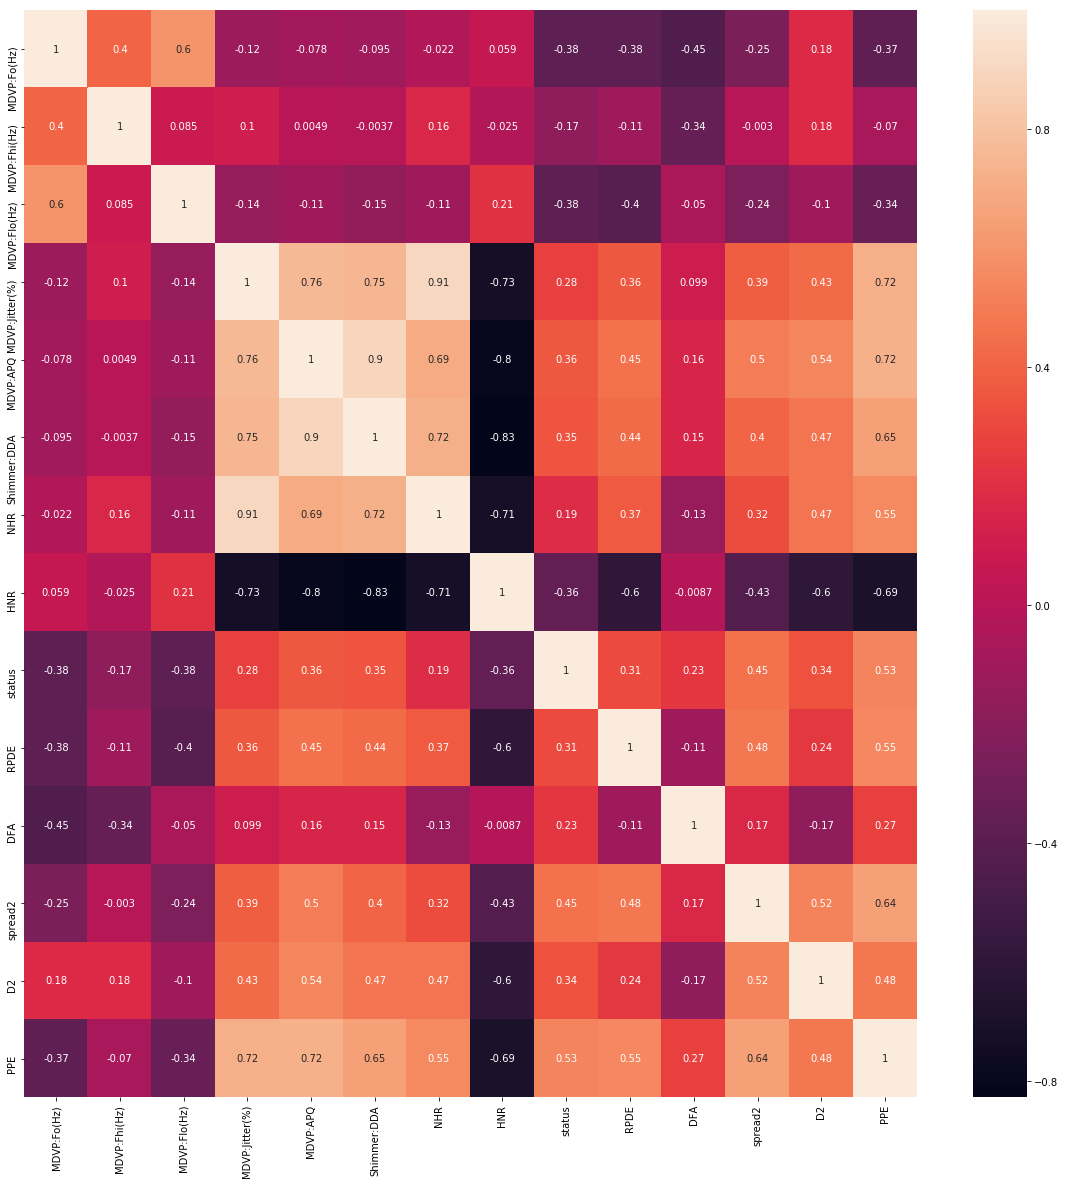

In [16]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot = True)

From the above correlation matrix, we see that most of the columns that were mutually related were removed.

## Boxplots

Boxplots for all the columns to check if there are any outliers

Boxplot for: MDVP:Fo(Hz)


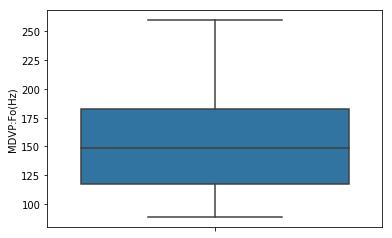

Boxplot for: MDVP:Fhi(Hz)


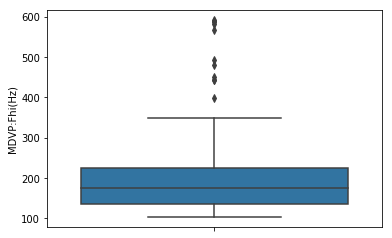

Boxplot for: MDVP:Flo(Hz)


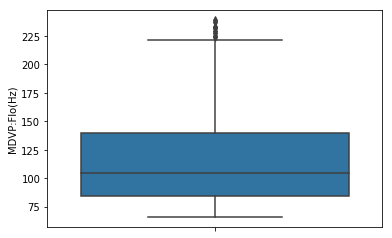

Boxplot for: MDVP:Jitter(%)


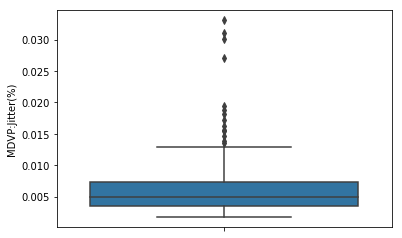

Boxplot for: MDVP:APQ


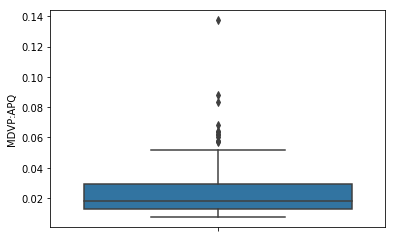

Boxplot for: Shimmer:DDA


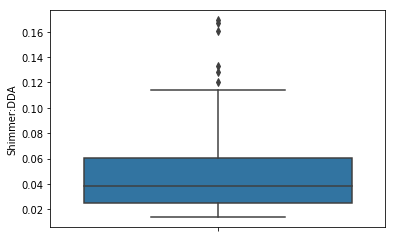

Boxplot for: NHR


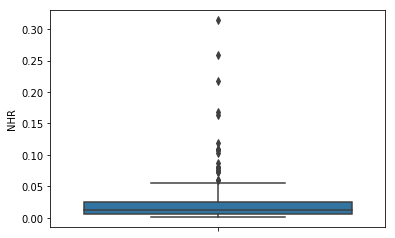

Boxplot for: HNR


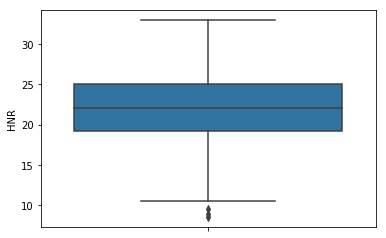

Boxplot for: status


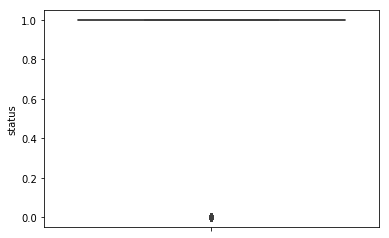

Boxplot for: RPDE


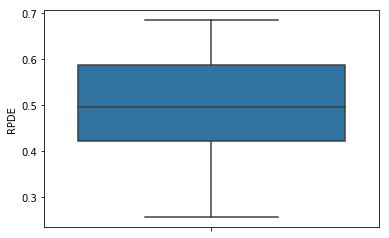

Boxplot for: DFA


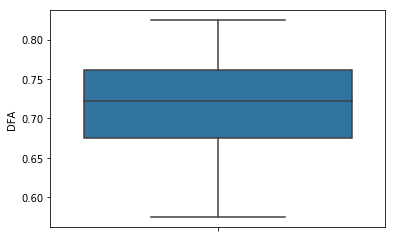

Boxplot for: spread2


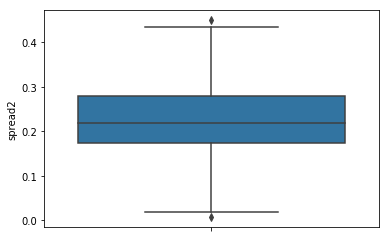

Boxplot for: D2


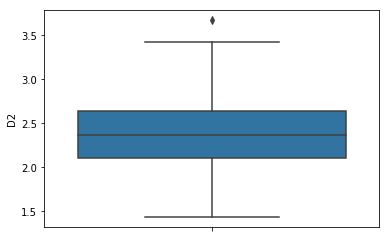

Boxplot for: PPE


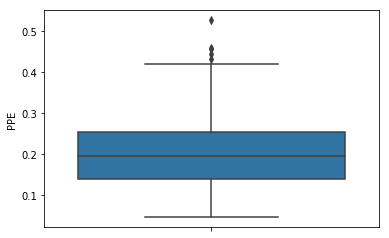

In [20]:

for i in range(0,14):
    #print(data.drop(columns = {'name','Jitter:DDP','MDVP:PPQ','MDVP:RAP','MDVP:Jitter(Abs)','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ5','Shimmer:APQ3','spread1'}).columns.size)
    print("Boxplot for: "+data_cor.drop(columns = 'name').columns[i])
    sns.boxplot(data_cor.drop(columns = 'name').iloc[:,i], orient = 'v')
    plt.show()

From above boxplots, we see that there are a few columns that have outliers

## Outlier Treatment

In [23]:
q1 = data_cor.quantile(0.25)
q3 = data_cor.quantile(0.75)
IQR = q3-q1
mean = data_cor.mean()
ulim = mean+1.5*IQR
llim = mean-1.5*IQR

In [34]:
print('   upper limit for all the columns: \n\n' + str(ulim))
print('\n\n   lower limit for all the columns: \n\n' + str(llim))

   upper limit for all the columns: 

MDVP:Fo(Hz)       252.024141
MDVP:Fhi(Hz)      331.119418
MDVP:Flo(Hz)      199.915881
MDVP:Jitter(%)      0.012078
MDVP:APQ            0.048561
Shimmer:DDA         0.101083
NHR                 0.054420
HNR                30.702224
status              0.753846
RPDE                0.747920
DFA                 0.848785
spread2             0.383836
D2                  3.187822
PPE                 0.379845
dtype: float64


   lower limit for all the columns: 

MDVP:Fo(Hz)       56.433141
MDVP:Fhi(Hz)      63.090418
MDVP:Flo(Hz)      32.733381
MDVP:Jitter(%)     0.000363
MDVP:APQ          -0.000399
Shimmer:DDA       -0.007097
NHR               -0.004725
HNR               13.069724
status             0.753846
RPDE               0.249151
DFA                0.587413
spread2            0.069185
D2                 1.575830
PPE                0.033258
dtype: float64


0.8487850461538464

### Removing outliers from all the columns

In [95]:
data_cor_num = data_cor.copy()
print(data_cor_num.shape)
#print(dataframe[dataframe.iloc[:,2]>ulim].iloc[:,2])

#Since number of columns is 15, we fix the range from 0-14 
for i in range(0,14):
    count = 0
    col_data = data_cor_num.iloc[:,i]
    col_name = data_cor_num.columns[i]
    #print(col_name)
    
    #Since columns 'name' and 'status' both are categorical variables, we exclude them from outlier treatment  
    if(col_name!='name' and col_name!='status'):
        for p in col_data:
            if p > ulim[col_name]:
                #print(ulim[col_name],p)
                data_cor_num.drop(index = data_cor_num[data_cor_num.iloc[:,i]==p].index[0],inplace = True)
                #print(dataframe[dataframe.iloc[:,2]<llim].iloc[:,2])
                count = count+1
            if p < llim[col_name]:
                #print(llim[col_name],p)
                data_cor_num.drop(index = data_cor_num[data_cor_num.iloc[:,i]==p].index[0],inplace = True)
                #print(i)
                count = count+1
        print("Number of outliers removed in "+ col_name +" --> "+str(count)+"\n")
print(data_cor_num.shape)


(195, 15)
Number of outliers removed in MDVP:Fo(Hz) --> 2

Number of outliers removed in MDVP:Fhi(Hz) --> 12

Number of outliers removed in MDVP:Flo(Hz) --> 11

Number of outliers removed in MDVP:Jitter(%) --> 14

Number of outliers removed in MDVP:APQ --> 3

Number of outliers removed in Shimmer:DDA --> 3

Number of outliers removed in NHR --> 2

Number of outliers removed in HNR --> 5

Number of outliers removed in RPDE --> 0

Number of outliers removed in DFA --> 2

Number of outliers removed in spread2 --> 7

Number of outliers removed in D2 --> 0

(134, 15)


## Plotting a pairplot for the outlier treated data

<Figure size 2160x2160 with 0 Axes>

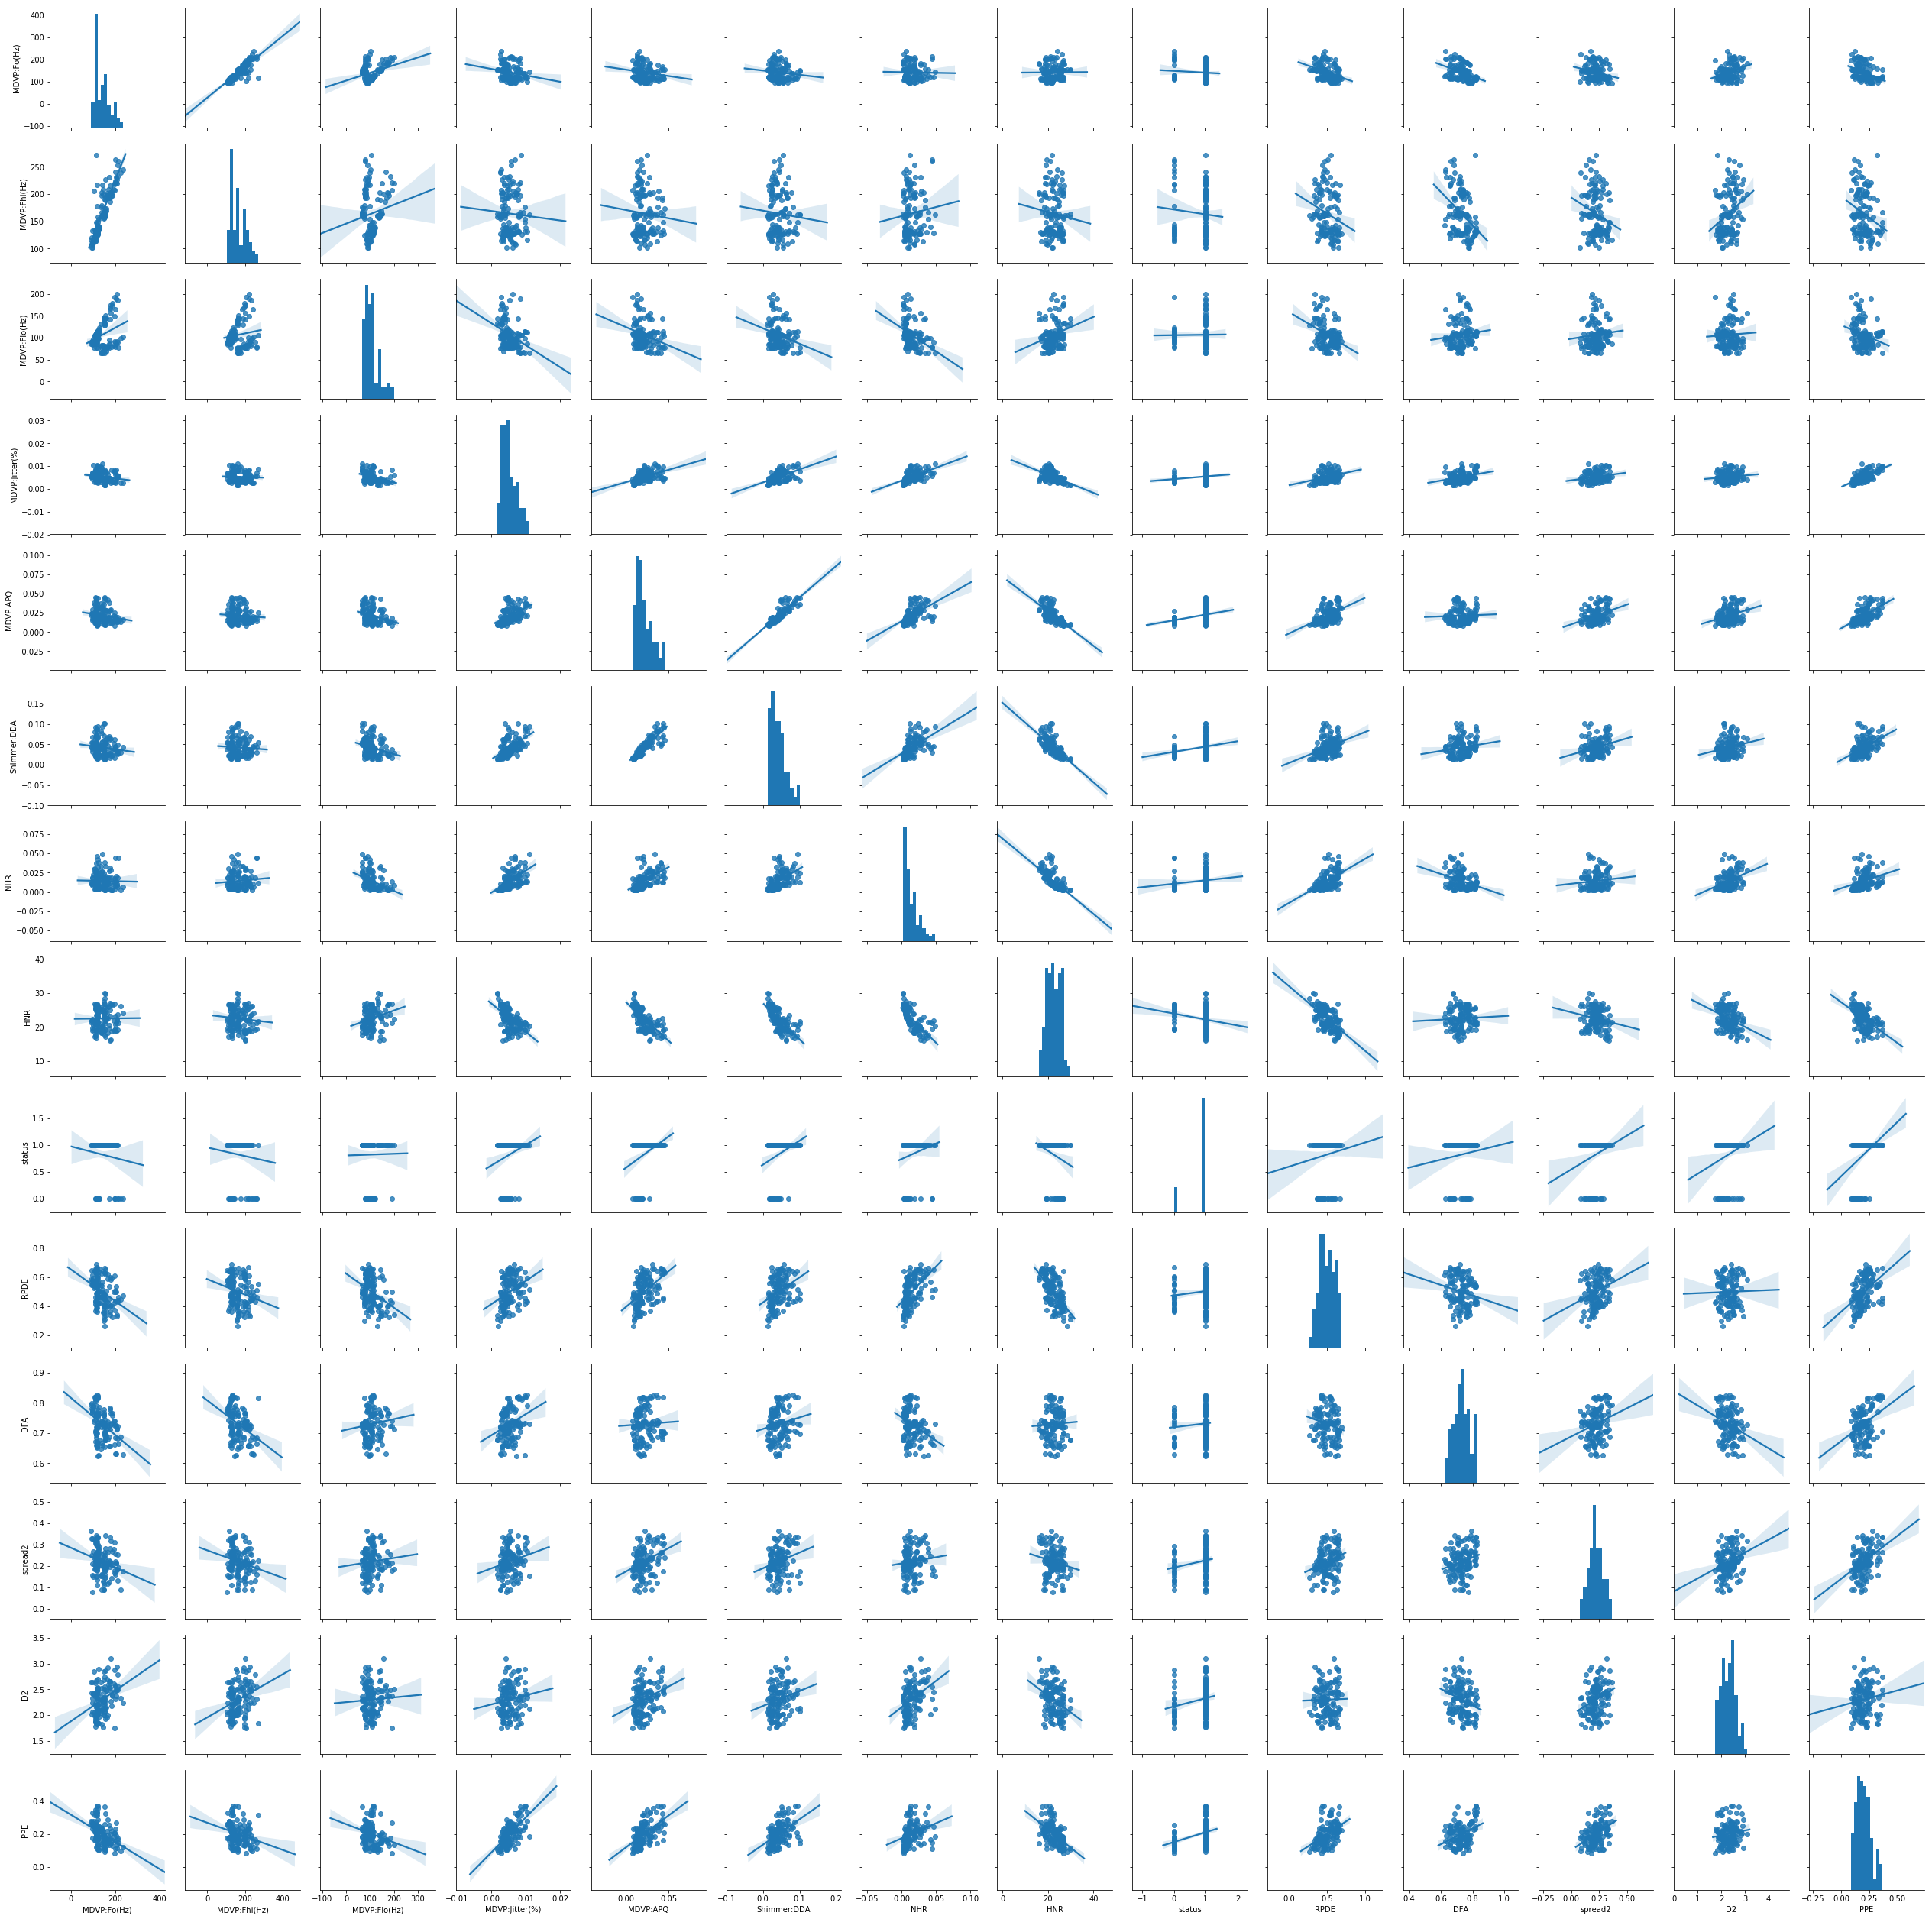

In [75]:
plt.figure(figsize=(30, 30))
sns.pairplot(data_cor_num.drop(columns = {'name'}), kind = 'reg')

From the above plot we can say that most of the parameters are positively corelated except, a few which from the regression line, we see that they are negatively corelated

## Test Train Split of the given Data

In [96]:
X = data_cor_num.drop(columns = {'name','status'})
y = data_cor_num.pop('status')

In [156]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=20)

## Decision Trees with the method of reducing 'entropy' - Without regularization parameters

In [157]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')

In [158]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [159]:
train_char_label = ['No', 'Yes']

In [160]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                     Imp
MDVP:Fo(Hz)     0.000000
MDVP:Fhi(Hz)    0.171794
MDVP:Flo(Hz)    0.146726
MDVP:Jitter(%)  0.101373
MDVP:APQ        0.000000
Shimmer:DDA     0.000000
NHR             0.220549
HNR             0.000000
RPDE            0.000000
DFA             0.000000
spread2         0.088940
D2              0.000000
PPE             0.270618


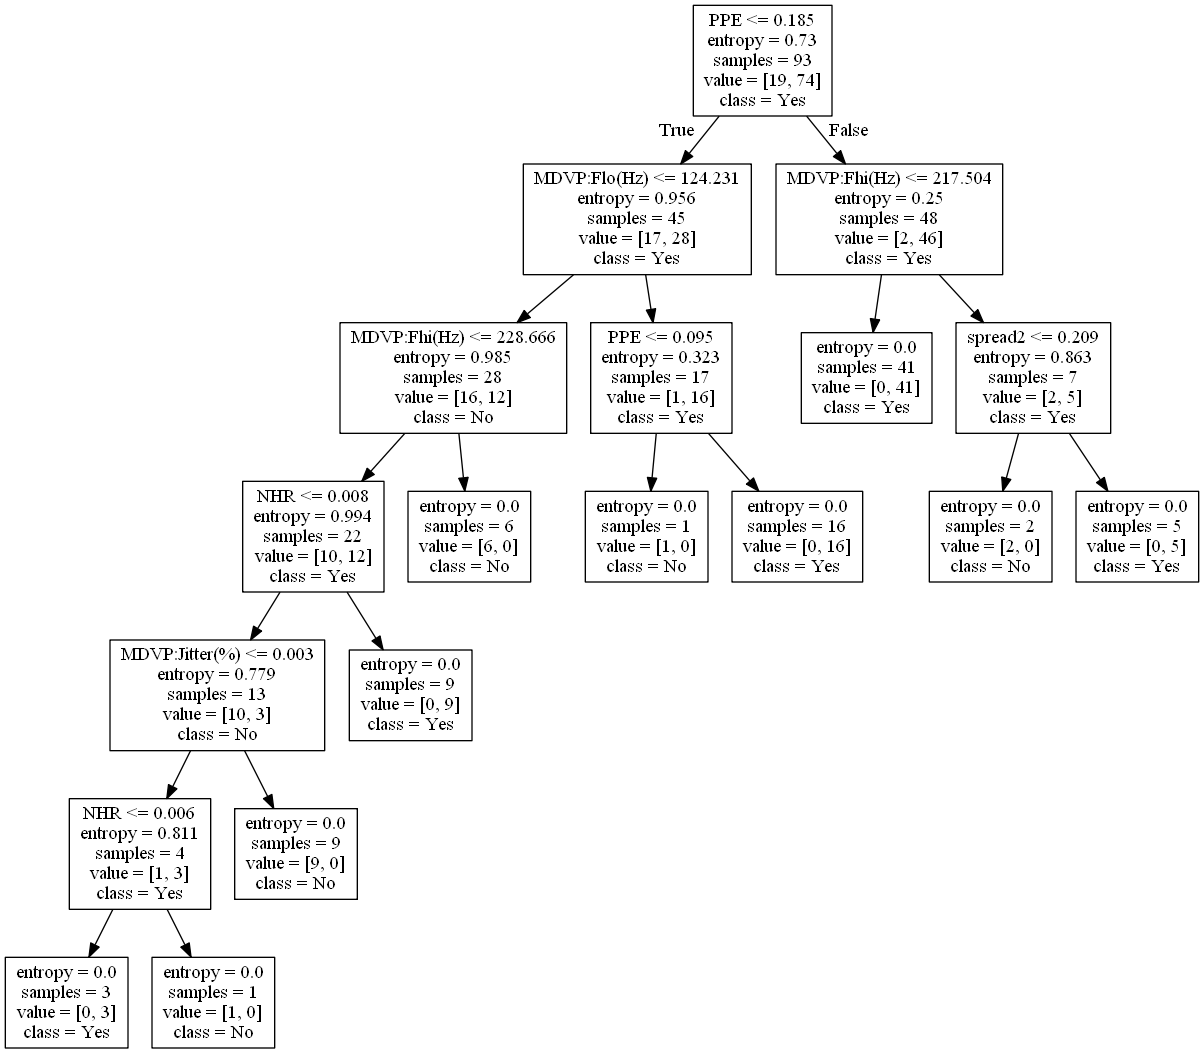

In [161]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view 
#or create a .png as below

system("dot -Tpng credit_tree.dot -o credit_tree.png")
Image("credit_tree.png")

In [163]:
print(dt_model.score(X_train , Y_train))
print(dt_model.score(X_test , Y_test))

1.0
0.8780487804878049


## Decision Trees with the method of reducing 'entropy' - Without regularization parameters

In [164]:
dt_model_reg = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, max_leaf_nodes = 8)
dt_model_reg.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=8, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [165]:
Credit_Tree_File = open('credit_tree_reg.dot','w')
dot_data = tree.export_graphviz(dt_model_reg, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model_reg.feature_importances_, columns = ["Imp_reg"], index = X_train.columns))

                 Imp_reg
MDVP:Fo(Hz)     0.000000
MDVP:Fhi(Hz)    0.197134
MDVP:Flo(Hz)    0.168368
MDVP:Jitter(%)  0.116326
MDVP:APQ        0.000000
Shimmer:DDA     0.000000
NHR             0.198263
HNR             0.000000
RPDE            0.000000
DFA             0.000000
spread2         0.102059
D2              0.000000
PPE             0.217850


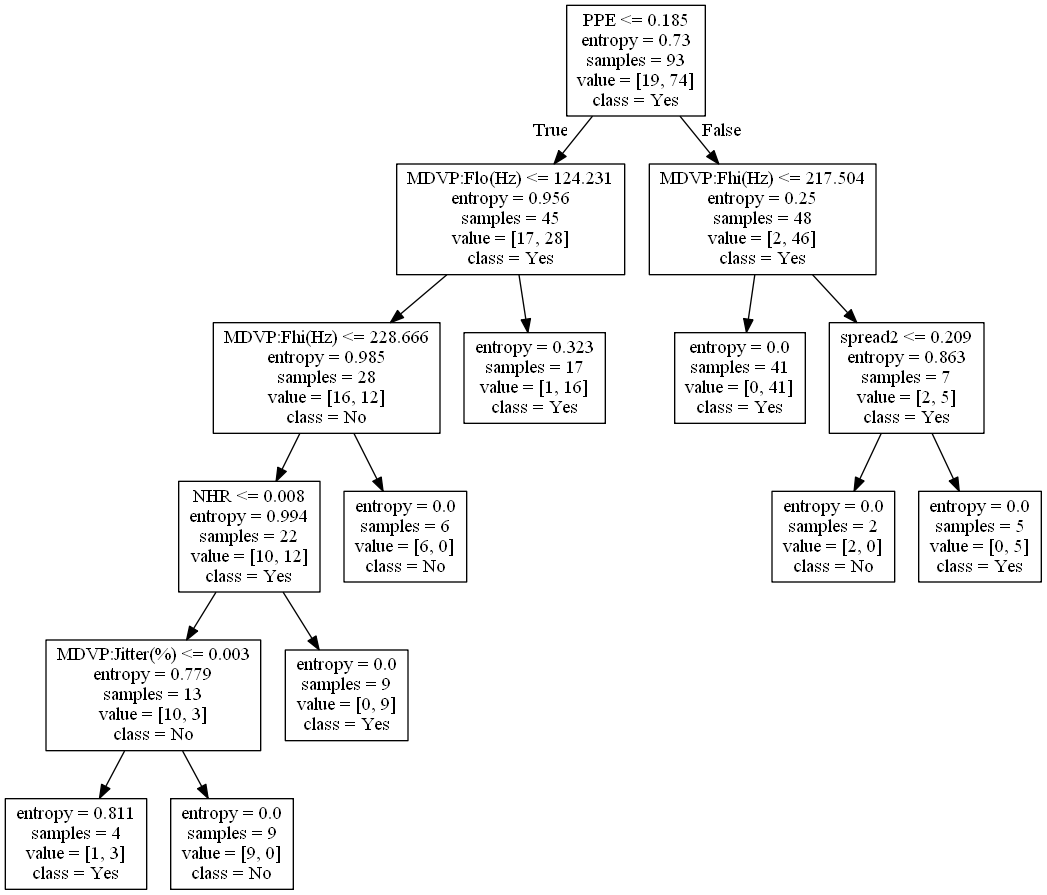

In [166]:
system("dot -Tpng credit_tree_reg.dot -o credit_tree_reg.png")
Image("credit_tree_reg.png")

In [167]:
print(dt_model_reg.score(X_train , Y_train))
print(dt_model_reg.score(X_test , Y_test))

0.978494623655914
0.9512195121951219


#### Without the regulatization parameters we can see that the model is overfitting for training data and hence, the accuracy of the model on the test data is low.

Model scores without regularization parameters:
   1. Training data: 1.0
   2. Test data: 0.8780487804878049

#### When we apply regularization parameters, we see that the model accuracy for training data decreases, but the accuracy of prediction increases significantly for test data. 

Model scores with regularization parameters:
   1. Training data: 0.978494623655914
   2. Test data: 0.9512195121951219

## Predicting the values using the above two models, comparing the confusion matrix

In [169]:
y_predict = dt_model.predict(X_test)

In [170]:
print(metrics.confusion_matrix(Y_test, y_predict))

[[ 3  2]
 [ 3 33]]


In [168]:
y_predict_reg = dt_model_reg.predict(X_test)

In [171]:
print(metrics.confusion_matrix(Y_test, y_predict_reg))

[[ 3  2]
 [ 0 36]]


## Crosstab

In [173]:
pd.crosstab(Y_test,y_predict)

col_0,0,1
status,,
0,3,2
1,3,33


In [174]:
pd.crosstab(Y_test,y_predict_reg)

col_0,0,1
status,,
0,3,2
1,0,36


## RandomForest

In [279]:
rdmfst = RandomForestClassifier(n_estimators = 50 ,random_state = 20, max_depth = 5, max_leaf_nodes = 8)
rdmfst = rdmfst.fit(X_train, Y_train)

In [280]:
y_predict = rdmfst.predict(X_test)
print(rdmfst.score(X_test , Y_test))

0.926829268292683


In [281]:
print(metrics.confusion_matrix(Y_test, y_predict))

[[ 2  3]
 [ 0 36]]


#### Optimal value for the estimators is 50, any value more than the value 50, the accuracy of the model drops to 90%. 